In [1]:
#create a rootDir and initialize ee and set up a map
import ee 
import os
import geemap

ee.Initialize()

rootDir = os.path.expanduser('~') + '/'
resultDir = rootDir + 'gfc_results/'

Map = geemap.Map()

In [2]:
#load false aoi
from utils import utils
asset = 'users/bornToBeAlive/aoi_PU'
aoi_name = utils.get_aoi_name(asset)

#display on the map
aoi = ee.FeatureCollection(asset)
Map.addLayer(aoi, {}, 'aoi_name')   
Map.centerObject(aoi, 8)

In [3]:
#create the shp file 
from scripts import make_aoi_shp

make_aoi_shp.make_aoi_shp(asset)

'/home/prambaud/gfc_wrapper_results/downloads/PU.shp'

In [4]:
from scripts import download_merge_glad as dmg
from scripts import download_merge_tandem as dmt
from utils import parameters as pm
from utils import utils
import os

#create false aoi
asset = 'users/bornToBeAlive/aoi_PU'
aoi_name = utils.get_aoi_name(asset)


dwnl_dir = pm.getDwnDir()

#load the Hansen_GFC-2019-v1.7
types = pm.getTypes()
prefix = "https://storage.googleapis.com/earthenginepartners-hansen/GFC-2019-v1.7/Hansen_GFC-2019-v1.7_"
for type in types:
    pattern = prefix + type + "_{0}_{1}.tif"
    name = aoi_name+'_' + type
    dmg.download_merge(asset, pattern, dwnl_dir, name)
    
#load the tcc2010
prefix = "https://glad.umd.edu/Potapov/TCC_2010/treecover2010_"
pattern = prefix + '{0}_{1}.tif'
name = aoi_name+'_'+'treecover2010'
dmg.download_merge(asset, pattern, dwnl_dir, name)

#load the tandem tiles
pattern = "https://download.geoservice.dlr.de/FNF50/files/"
name = aoi_name+'_'+'tandem'
dmt.download_merge(asset, pattern, dwnl_dir, name)

'/home/prambaud/gfc_wrapper_results/downloads/PU_tandem.tif'

In [5]:
from scripts import make_map_Glad2010

#create false aoi
asset = 'users/bornToBeAlive/aoi_PU'
threshold = 20

make_map_Glad2010.make_map_Glad2010(asset, threshold)

'Glad 2010 map already performed'

In [6]:
from scripts import make_map_threshold

#create false aoi
asset = 'users/bornToBeAlive/aoi_PU'
threshold = 20

make_map_threshold.make_map_threshold(asset, threshold)

'gfc map threshold already performed'

In [7]:
from scripts import make_map_threshold_clump

#create false aoi
asset = 'users/bornToBeAlive/aoi_PU'
threshold = 20

make_map_threshold_clump.make_map_threshold_clump(asset, threshold)

'gfc clump map already performed'

stats already computed


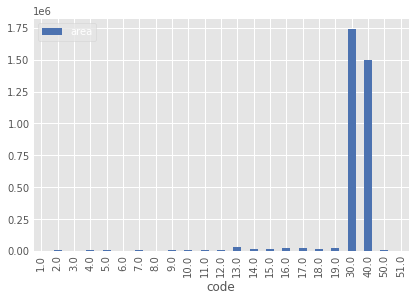

In [13]:
from scripts import compute_areas

#create false aoi
asset = 'users/bornToBeAlive/aoi_PU'
threshold = 20

file = compute_areas.compute_areas(asset, threshold)

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn-deep'])
df = pd.read_csv(file)
df.plot(x ='code', y='area', kind = 'bar')
plt.show()